In [1]:
!pip install -qU langchain langgraph langchain-google-genai python-dotenv

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI 
from langgraph.graph import add_messages , END , START , StateGraph
from typing import TypedDict , Annotated


class MessageState(TypedDict):
    messages : Annotated[list , add_messages]


builder = StateGraph(MessageState)

In [10]:
llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash')

def llm_message(state:MessageState):
    return {"messages" : [llm.invoke(state["messages"])]}

In [11]:
builder.add_node("llm" , llm_message)

In [17]:
builder.add_edge(START , "llm")
builder.add_edge("llm" , END)

In [18]:
graph = builder.compile()

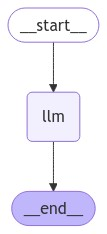

In [19]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [23]:
result = graph.invoke({"messages" : [("human" , "What is AI")]})

print(result["messages"][-1].content)

## What is AI?

**AI, or Artificial Intelligence**, is the simulation of human intelligence processes by computers. These processes include:

* **Learning:**  Acquiring information and rules from data to improve performance.
* **Reasoning:**  Using logic and rules to draw conclusions and make decisions.
* **Problem-solving:**  Finding solutions to complex problems.
* **Perception:**  Interpreting sensory information like images, sounds, and text.
* **Natural language processing:**  Understanding and generating human language.

**Types of AI:**

* **Narrow AI (Weak AI):**  Designed for specific tasks, like playing chess or recommending products. Most AI today falls into this category.
* **General AI (Strong AI):**  Hypothetical AI with human-like intelligence, capable of performing any intellectual task a human can.
* **Super AI:**  Hypothetical AI surpassing human intelligence in all aspects.

**Applications of AI:**

AI is used in a wide range of fields, including:

* **Healthcare:** 